Histogram

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [38]:
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/Nature.jpg")

In [39]:
from google.colab.patches import cv2_imshow

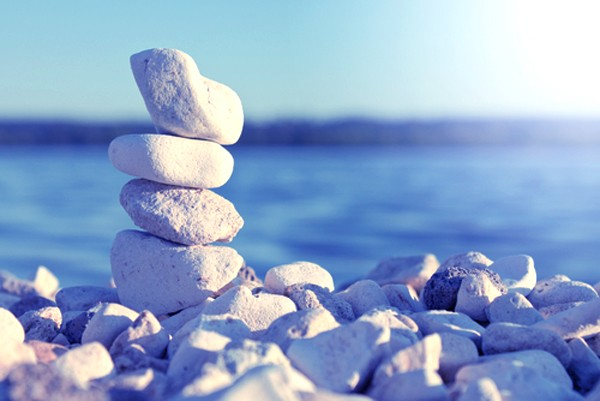

In [40]:
cv2_imshow(image)

In [41]:
image.shape

(401, 600, 3)

In [8]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

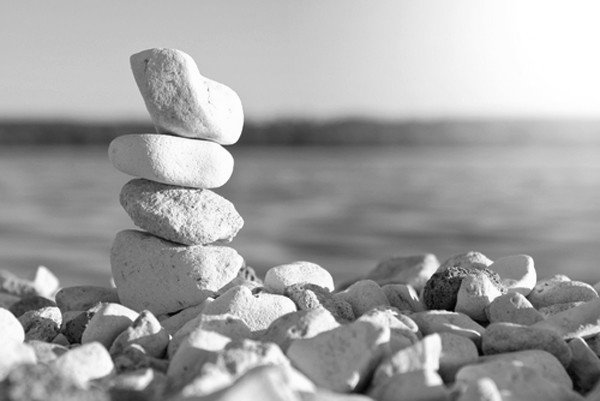

In [9]:
cv2_imshow(image)

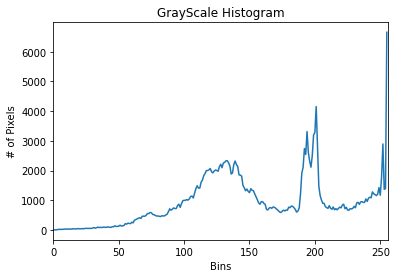

-1

In [10]:
hist = cv2.calcHist([image],[0],None,[256],[0,256])

plt.figure()
plt.title("GrayScale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()
cv2.waitKey(0)

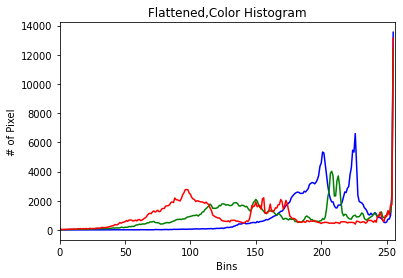

In [43]:
chans = cv2.split(image)
colors = ("b","g","r")
plt.figure()
plt.title("Flattened,Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixel")

for (chan,color) in zip(chans,colors):
  hist = cv2.calcHist([chan],[0],None,[256],[0,256])
  plt.plot(hist, color = color)
  plt.xlim([0,256])

2D histogram shape: (32, 32),with 1024 value


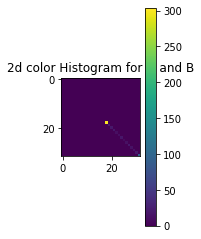

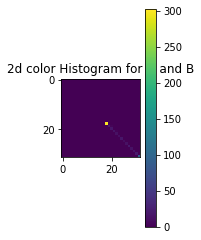

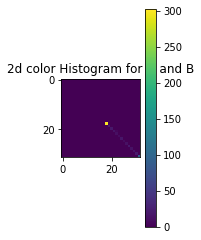

In [46]:
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chan[1],chan[0]],[0,1],None,[32,32],[0,256,0,256])
p = ax.imshow(hist,interpolation="nearest")
ax.set_title("2d color Histogram for G and B")
plt.colorbar(p)

fig = plt.figure()
ax = fig.add_subplot(132)
hist = cv2.calcHist([chan[1],chan[3]],[0,1],None,[32,32],[0,256,0,256])
p = ax.imshow(hist,interpolation="nearest")
ax.set_title("2d color Histogram for G and B")
plt.colorbar(p)

fig = plt.figure()
ax = fig.add_subplot(133)
hist = cv2.calcHist([chan[0],chan[2]],[0,1],None,[32,32],[0,256,0,256])
p = ax.imshow(hist,interpolation="nearest")
ax.set_title("2d color Histogram for G and B")
plt.colorbar(p)

print("2D histogram shape: {},with {} value".format(hist.shape,hist.flatten().shape[0]))

In [48]:
hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
print("3D histogram shape:{},with {} values".format(hist.shape,hist.flatten().shape[0]))
plt.show()


3D histogram shape:(8, 8, 8),with 512 values


Histogram Equlaization

In [49]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [50]:
eq = cv2.equalizeHist(image)

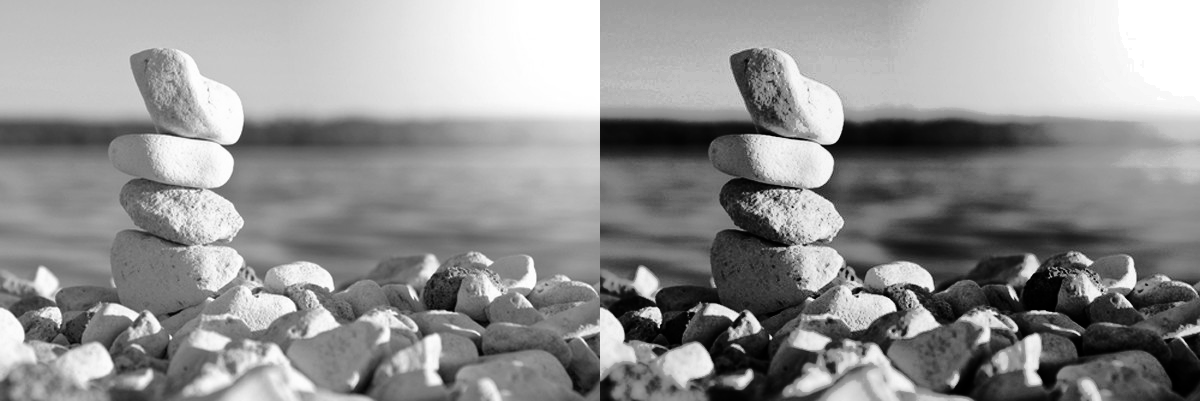

In [52]:
cv2_imshow(np.hstack([image,eq]))

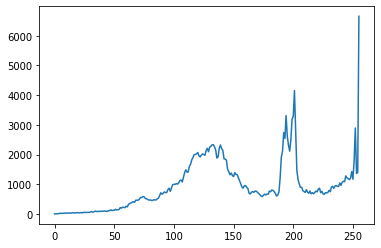

In [53]:
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)

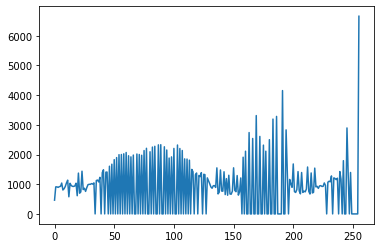

In [54]:
hist = cv2.calcHist([eq],[0],None,[256],[0,256])
plt.plot(hist)

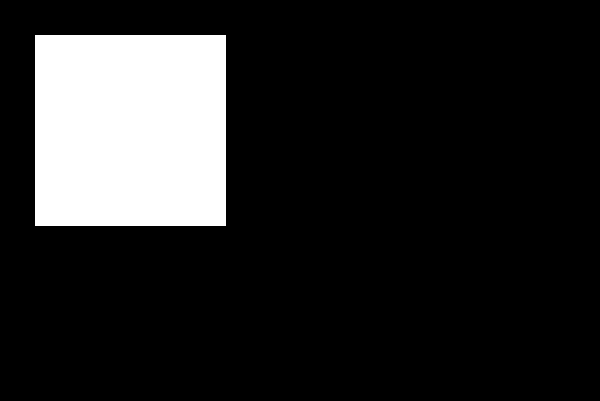

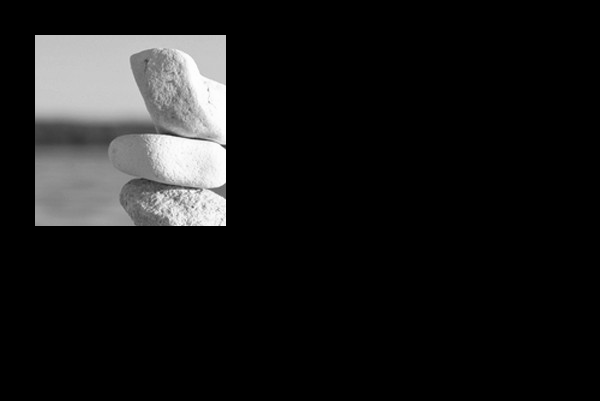

In [56]:
# Create a mask
mask = np.zeros(image.shape[:2],dtype='uint8')
cv2.rectangle(mask,(35,35),(225,225),255,-1)
cv2_imshow(mask)
masked = cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(masked)

In [60]:
plt_histogram(image,"Histogram for masked Image",mask=mask)
plt.show()

NameError: ignored

In [61]:
def plot_histogram(image,title,mask=mask):
  chans = cv2.split(image)
  colors = ("b","g","r")
  plt.figure()
  plt.title(title)
  plt.xlabel("Bins")
  plt.ylabel("#pixels")

  for (chan,color) in zip(chans,colors):
    hist=cv2.calcHist([chan],[0],mask,[256],[0,256])
    plt.plot(hist,color = color)
    plt.xlim([0,256])


In [68]:
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/DatasetALandP/data/train/alien/150.jpg")

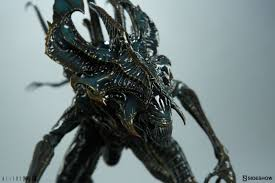

In [69]:
cv2_imshow(image)

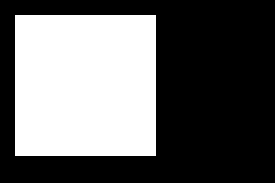

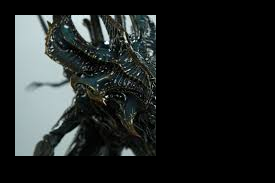

In [72]:
# Create a mask
mask = np.zeros(image.shape[:2],dtype='uint8')
cv2.rectangle(mask,(15,15),(155,155),255,-1)
cv2_imshow(mask)
masked = cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(masked)

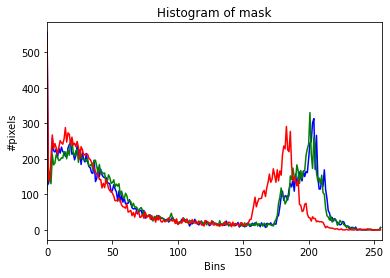

In [73]:
plot_histogram(image,"Histogram of mask",mask=mask)